# **Phương pháp Kaplan - Meier**
********************************************************************************************************************

# **Import thư viện và hiển thị kết quả**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data from file CSV
file_path = 'D:/Code ĐA2/Data/ai4i2020.csv'

# Read data
df = pd.read_csv(file_path)

# Display data information 
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

(None,
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
 0    1     M14860    M                298.1                    308.6   
 1    2     L47181    L                298.2                    308.7   
 2    3     L47182    L                298.1                    308.5   
 3    4     L47183    L                298.2                    308.6   
 4    5     L47184    L                298.2                    308.7   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0                    1551         42.8                0                0    0   
 1                    1408         46.3                3                0    0   
 2                    1498         49.4                5                0    0   
 3                    1433         39.5                7                0    0   
 4                    1408         40.0                9                0    0   
 
    HDF  PWF  OSF  RNF  
 0    0    0    0    0  
 1    0  

In [2]:
import pandas as pd

# Ckeck 0-values of the column 'Tool wear [min]'
count_zeros = (df['Tool wear [min]'] == 0).sum()

# Print the result
print(f"The number of elements with a value of 0 in column 'Tool wear [min]': {count_zeros}")

# Delete the rows got value 0 'Tool wear [min]'
df = df[df['Tool wear [min]'] != 0]

# Print the new Dataframe
print("The new Dataframe:")
print(df)



The number of elements with a value of 0 in column 'Tool wear [min]': 120
The new Dataframe:
        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
5         6     M14865    M                298.1                    308.6   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0            

# **Tạo mảng để tính toán**

In [3]:
# Input data into numpy array
times = np.array(df['Tool wear [min]'])
events = np.array(df['Machine failure'])

# **Tính toán các giá trị hàm sống sót**

In [4]:
# Calculate the values of the survival function
unique_times = np.unique(times)  # Extract the unique time points
survival_probabilities = []  # List that store the survival probabilities
n_at_risk = len(times)  # Number of remaining subjects

for t in unique_times:
    # Count the number of events occurring at time t
    d = np.sum(events[times == t])
    # Update the survival probability
    survival_prob = (n_at_risk - d) / n_at_risk if n_at_risk > 0 else 0
    survival_probabilities.append(survival_prob)
    # Update the number of remaining subjects
    n_at_risk -= np.sum(times == t)

# Calculate the cumulative survival probability
cumulative_probabilities = [1.0]  # Start with the survival probability = 1
for p in survival_probabilities:
    cumulative_probabilities.append(cumulative_probabilities[-1] * p)

# **Vẽ đồ thị**

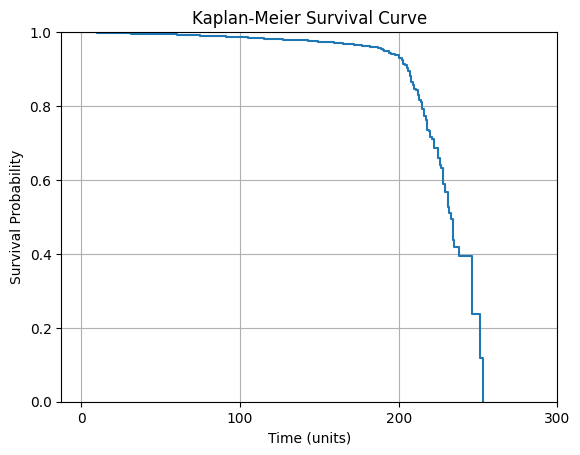

In [5]:
# Create time values for the x-axis
time_steps = [0] + list(unique_times)  # Add 0 to the time list to start from 0

# Ensure survival_prob_steps has the same size as time_steps
survival_prob_steps = [1.0]  # Add initial survival probability
for p in survival_probabilities:
    survival_prob_steps.append(survival_prob_steps[-1] * p)

# Check the sizes of time_steps and survival_prob_steps
if len(time_steps) != len(survival_prob_steps):
    raise ValueError(f"Size mismatch: time_steps={len(time_steps)}, survival_prob_steps={len(survival_prob_steps)}")

# Plot the Kaplan-Meier curve
plt.step(time_steps, survival_prob_steps, where='post')
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (units)')
plt.ylabel('Survival Probability')
plt.xticks(time_steps)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
xticks = np.arange(0, int(max(times)) + 50, 100)  # Generate a list of step values
plt.xticks(xticks)
plt.grid()
plt.show()


# **So sánh với sử dụng thư viện**

In [6]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


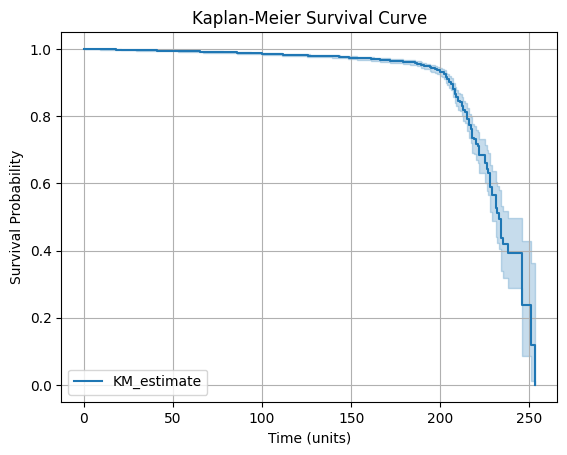

In [7]:
from lifelines import KaplanMeierFitter

# Đọc dữ liệu từ file CSV
df = pd.read_csv('D:/Code ĐA2/Data/ai4i2020.csv')

# Giả sử dữ liệu có hai cột: 'time' và 'event_occurred'
#times = df['time']  # Thời gian
#events = df['event_occurred']  # Sự kiện xảy ra (1 nếu sự kiện xảy ra, 0 nếu không)

# Tạo đối tượng KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fitting the data
kmf.fit(durations=times, event_observed=events)

# Vẽ biểu đồ Kaplan-Meier
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (units)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()
